# 1 hour machine learning project

Project taken from Kaggle : https://www.kaggle.com/blastchar/telco-customer-churn


"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]




## My company : Fabdev (fabdev.fr)

## My name : Lucas Berbesson


# Let's get started

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [85]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.fillna(0)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [87]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [88]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
df.isnull().sum()

Rows     :  7043
Columns  :  21


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [89]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

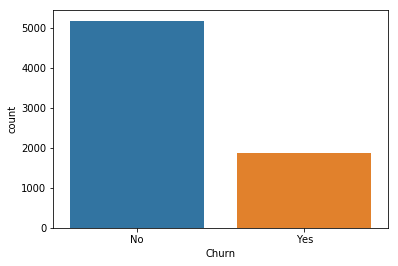

In [90]:
sns.countplot(df["Churn"])

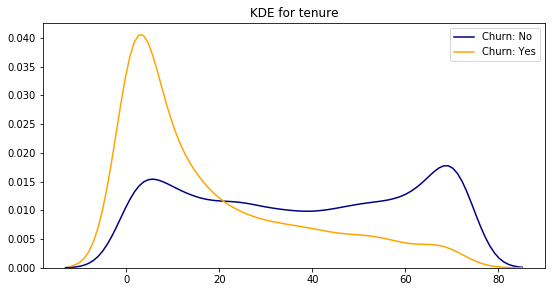

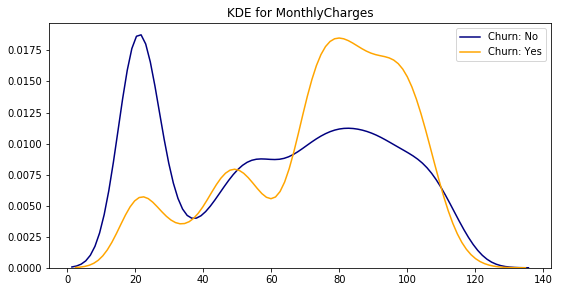

In [91]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4.5))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')

From the plots above we can conclude that:

- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn


In [ ]:
df.nunique()[df.nunique() < 6].keys().tolist()

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
telcom = df.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how= "left")

In [94]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992611
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172165
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958066
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193672
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938874


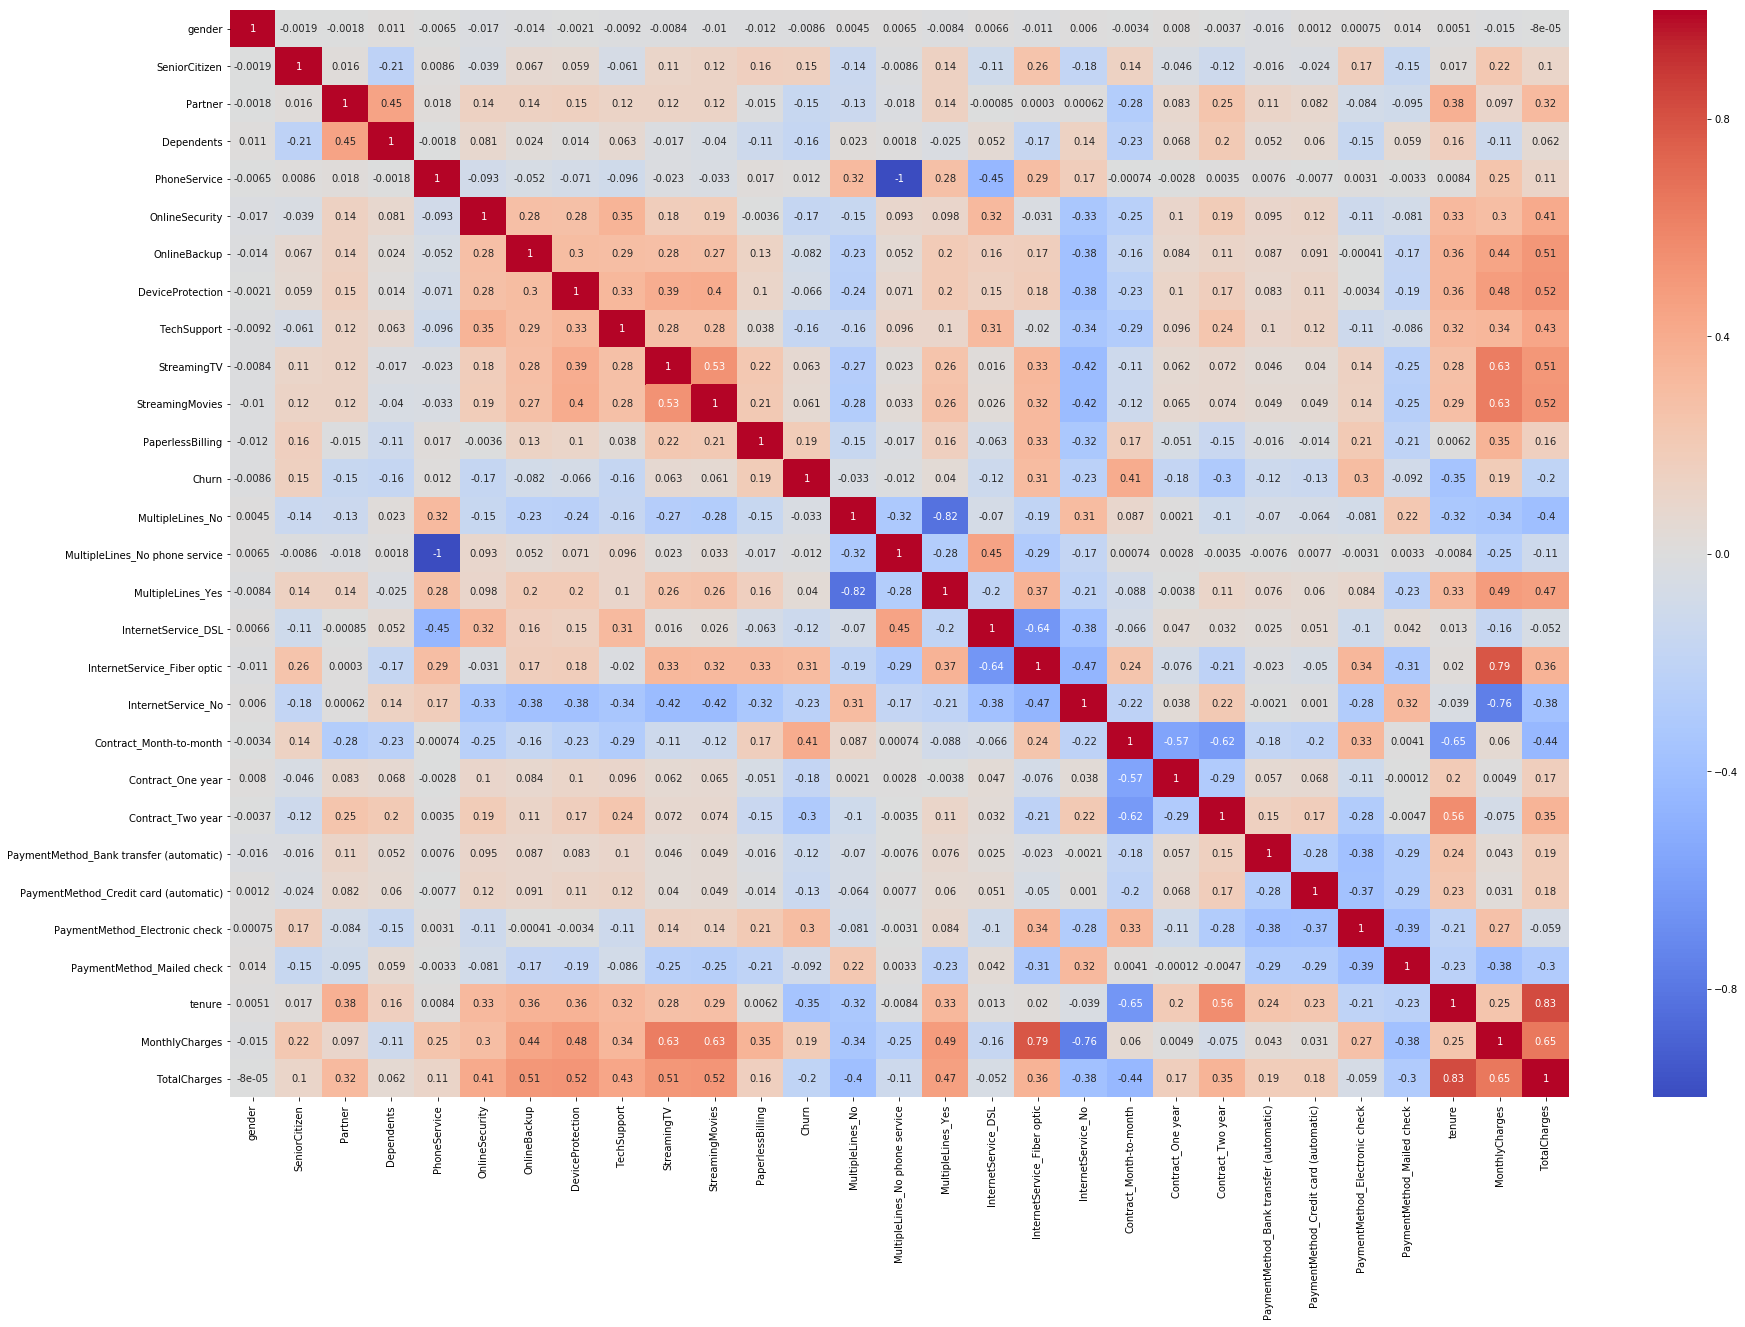

In [97]:
#correlation
plt.figure(figsize=(30,20))
correlation = sns.heatmap(telcom.corr(), annot=True, cmap="coolwarm")

In [98]:
t = telcom.corr()["Churn"].abs()
t.sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
tenure                                     0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                         0.227890
TotalCharges                               0.198324
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                          0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
SeniorCitizen                              0.150889
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL                        0.124214
PaymentMethod_Bank transfer (automatic)    0.117937
PaymentMetho

In [99]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992611
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172165
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958066
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193672
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938874


In [100]:
telcom = telcom.drop(['TotalCharges'],axis=1)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

def telecom_churn_prediction(algorithm,training_x,testing_x,training_y,testing_y,cols,cf=False) :
    
    #model
    algorithm.fit(training_x,training_y.values.ravel())
    predictions   = algorithm.predict(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    print("\n Confusion matrix : \n")
    print(conf_matrix)          
    
    if cf: 
        column_df     = pd.DataFrame(cols)
        coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                                  right_index= True, how = "left"))
        coef_sumry.columns = ["coefficients","features"]
        coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
        features_importance = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Portland",
                                      line = dict(width = .6,color = "black")))


        py.plot([features_importance])
    return 


In [1]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,cols,"coefficients")

NameError: name 'telecom_churn_prediction' is not defined

**The precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  
Ex : 81% of the time the algorithm makes the right prediction about the fact that someone did not survive


**The recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.  
Ex : 35% of the time the algorithm does not detect that someone will survive

**The F1 score** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:
F1 = 2 * (precision * recall) / (precision + recall)


**The support** is the number of occurrences of each class in y_true.

**Confusion matrix** : a matrix where C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.



We got 81% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.


In [104]:
telcom['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [105]:
from sklearn.utils import resample
 
data_majority = telcom[telcom['Churn']==0]
data_minority = telcom[telcom['Churn']==1]
 
data_majority_downsampled = resample(data_majority,
replace=True,
n_samples=1869, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
telcom_balanced = pd.concat([data_minority, data_majority_downsampled])
 
telcom_balanced['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [106]:
#splitting train and test data 
train,test = train_test_split(telcom_balanced,test_size = .25 ,random_state = 111)
cols    = [i for i in telcom_balanced.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [107]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,cols,"coefficients")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
              precision    recall  f1-score   support

          0       0.82      0.70      0.75       480
          1       0.72      0.84      0.78       455

avg / total       0.77      0.77      0.76       935


 Confusion matrix : 

[[335 145]
 [ 74 381]]


In [ ]:
telcom_balanced.columns

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier() 
telecom_churn_prediction(gbc,train_X,test_X,train_Y,test_Y,cols)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


for algorithm in [KNeighborsClassifier, SVC, LinearSVC, NuSVC,DecisionTreeClassifier,RandomForestClassifier,
                  AdaBoostClassifier,GradientBoostingClassifier,GaussianNB,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis]:
    algo = algorithm() 
    telecom_churn_prediction(algo,train_X,test_X,train_Y,test_Y,cols)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
              precision    recall  f1-score   support

          0       0.79      0.68      0.73       480
          1       0.70      0.81      0.75       455

avg / total       0.75      0.74      0.74       935


 Confusion matrix : 

[[324 156]
 [ 86 369]]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 Classification report : 
              precision    recall  f1-score   support

          0       0.81      0.63      0.71       480
          1       0.68      0.84      0.75       455

avg / total       0.75      0.73      0.73       935


 Confusion matrix : 

[[302 178]
 [ 72 383]]
LinearSVC(C=1.0, class_weight=Non

/Users/lucasberbesson/.local/share/virtualenvs/datascience-H_hbnR-f/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/Users/lucasberbesson/.local/share/virtualenvs/datascience-H_hbnR-f/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:

Variables are collinear

